# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create the API call
url = "https://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

query_url = f"{url}&appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city)
city_data = response.json()
city_data

{'cod': '404', 'message': 'city not found'}

In [4]:
#create lists for each element needed from the API

lat = []
long = []
humid = []
temp = []
cloud = []
wind = []
country = []
date = []
df_cities = []

set_count = 1
record_count = 1

print("Beginning Data Retrieval")
print("------------------------")

for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count +=1
    
    try:
        city_data = requests.get(query_url + city).json()
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        humid.append(city_data["main"]["humidity"])
        temp.append(city_data["main"]["temp_max"])
        cloud.append(city_data["clouds"]["all"])
        wind.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        df_cities.append(city)
#         print(f"Processing Record: {record_count} of {set_count} | {city}")
    except:
        print("City not found. Skipping")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | fairbanks
Processing Record 4 of Set 1 | lujiang
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | arauca
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | irbeyskoye
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | port keats
Processing Record 16 of Set 1 | pingzhuang
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ustyuzhna
Processing Record 22 of Set 1 | tukrah
Processing Record 23 of Set 1 | jamestown
Processing Re

Processing Record 40 of Set 4 | murgab
Processing Record 41 of Set 4 | nuevo progreso
Processing Record 42 of Set 4 | coihaique
Processing Record 43 of Set 4 | toyooka
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | shenzhen
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | pacific grove
Processing Record 0 of Set 5 | nioro
Processing Record 1 of Set 5 | gogrial
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | pangkalanbuun
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | miranorte
City not found. Skipping
Processing Record 8 of Set 5 | palmer
Processing Record 9 of Set 5 | kremsmunster
Processing Record 10 of Set 5 | zhigansk
Processing Record 11 of Set 5 | itarema
Processing Record 12 of Set 5 | horki
Processing Reco

Processing Record 33 of Set 8 | chongoyape
Processing Record 34 of Set 8 | viligili
City not found. Skipping
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | mandalgovi
Processing Record 37 of Set 8 | colac
Processing Record 38 of Set 8 | pamekasan
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping
Processing Record 41 of Set 8 | shreveport
Processing Record 42 of Set 8 | dingzhou
Processing Record 43 of Set 8 | jieshi
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | valdivia
Processing Record 46 of Set 8 | noumea
Processing Record 47 of Set 8 | henties bay
Processing Record 48 of Set 8 | warqla
City not found. Skipping
Processing Record 49 of Set 8 | wangaratta
Processing Record 0 of Set 9 | ezhou
Processing Record 1 of Set 9 | burriana
Processing Record 2 of Set 9 | pongol
Processing Record 3 of Set 9 | la asuncion
Processing Record 4 of Set 9 | isangel
Processing Record 5 of 

Processing Record 21 of Set 12 | huinan
Processing Record 22 of Set 12 | sosua
Processing Record 23 of Set 12 | nedumangad
Processing Record 24 of Set 12 | bathsheba
Processing Record 25 of Set 12 | fort nelson
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | bull savanna
Processing Record 28 of Set 12 | sibu
Processing Record 29 of Set 12 | tarauaca
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | diofior
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | magadan
Processing Record 34 of Set 12 | vernon
Processing Record 35 of Set 12 | siderno
Processing Record 36 of Set 12 | oistins
Processing Record 37 of Set 12 | porto torres
Processing Record 38 of Set 12 | lahaina
Processing Record 39 of Set 12 | farafangana
Processing Record 40 of Set 12 | suao
City not found. Skipping
Processing Record 41 of Set 12 | saint anthony
Processing Record 42 of Set 12 | vengerovo
Processing Record 43 of Set 12 | iskateley


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert the data into a DF
weather_data = pd.DataFrame({"City": df_cities,
                           "Lat": lat,
                           "Lng": long,
                           "Max Temp": temp,
                           "Humidity": humid,
                           "Cloudiness": cloud,
                           "Wind Speed": wind,
                           "Country": country,
                           "Date": date})
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-21.6403,-41.0511,75.34,84,15,6.64,BR,1649736243
1,thompson,55.7435,-97.8558,24.85,97,95,5.03,CA,1649736243
2,fairbanks,64.8378,-147.7164,39.54,54,28,2.59,US,1649736000
3,lujiang,31.2581,117.2817,84.00,43,74,12.73,CN,1649736244
4,ushuaia,-54.8000,-68.3000,35.24,89,46,6.85,AR,1649736171


In [6]:
#save data frame into csv file
weather_data.to_csv("../output_data/Weather_cities.csv")

In [7]:
#create the dataframe of count, mean etc.
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.673210,17.928525,59.161436,71.296099,58.576241,8.381365,1.649736e+09
std,33.624907,91.369501,22.342355,21.298919,38.840058,5.593839,9.856555e+01
min,-54.800000,-179.166700,-12.770000,1.000000,0.000000,0.000000,1.649736e+09
25%,-8.505075,-64.172675,42.325000,61.000000,19.750000,4.487500,1.649736e+09
50%,22.823350,24.458450,63.795000,75.000000,69.500000,6.835000,1.649736e+09
75%,47.812525,101.726275,76.880000,88.000000,99.000000,11.500000,1.649736e+09
max,78.218600,179.316700,99.410000,100.000000,100.000000,37.980000,1.649737e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Inspect the data and remove the cities where humiity is >100%

humid_weather_df = weather_data.loc[(weather_data["Humidity"] > 100)]
humid_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_weather_df.index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

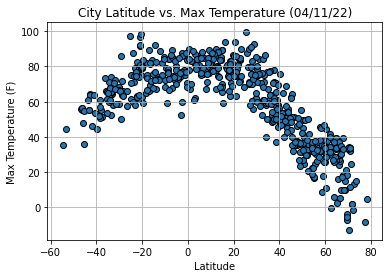

In [11]:
#create the variables for the plot
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]

plt.scatter(x_values, y_values, edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (04/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(f"../Images/Max Temperature vs Latitude")
plt.show()

In [ ]:
#Analyze
#This plot is analyzing the change in temperature versus the latitude of the city. Because the equator is at 0, the temperature
# is the warmest and as you get farther away the temperature drops which is why the scatter is in an upside "U" shape.

## Latitude vs. Humidity Plot

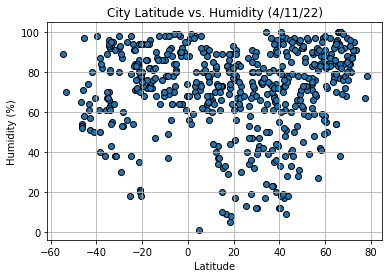

In [12]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]

plt.scatter(x_values, y_values, edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f"../Images/Humidity vs Latitude")
plt.show()

In [ ]:
#Analyze
# The graph above is showing the percent of humididy based on the latitude. There does not appear to be a strong correlation
#other than it appears the averae humidity per city appears to be above 60%.

## Latitude vs. Cloudiness Plot

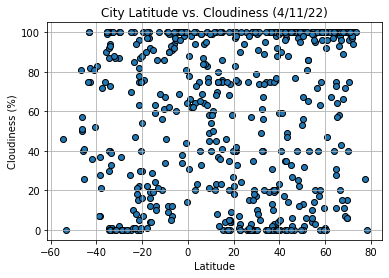

In [13]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]

plt.scatter(x_values, y_values, edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f"../Images/Cloudiness vs Latitude")
plt.show()

In [ ]:
#Analyze
#This scatter plot appears to be plotting the percent of clouds per day. There does not appear to be much of a correlation. 
#However, there are a lot of cities that either have clouds almost 100% of the time and cities that do not have many clouds at all.

## Latitude vs. Wind Speed Plot

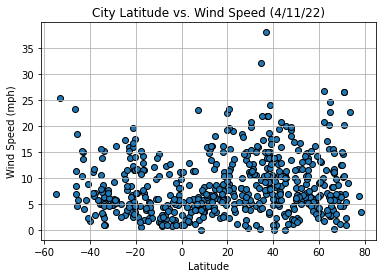

In [14]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]

# y = np.array([1, 10, 20, 30, 40])
plt.scatter(x_values, y_values, edgecolors="black")

plt.title("City Latitude vs. Wind Speed (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig(f"../Images/Wind Speed vs Latitude")
plt.show()

In [ ]:
#Analyze
#This plot is illustrating how a lot of cities average wind speed hovers between 5 and 15 mph regardless of their latitude.

## Linear Regression

In [15]:
#create a dataframe for each hemisphere
nhemi_df = weather_data.loc[weather_data["Lat"] > 0]
shemi_df = weather_data.loc[weather_data["Lat"] < 0]
shemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-21.6403,-41.0511,75.34,84,15,6.64,BR,1649736243
4,ushuaia,-54.8000,-68.3000,35.24,89,46,6.85,AR,1649736171
7,rikitea,-23.1203,-134.9692,79.14,71,1,15.84,PF,1649736245
11,avarua,-21.2078,-159.7750,80.65,83,82,3.44,CK,1649736247
14,port keats,-14.2500,129.5500,92.10,47,24,5.32,AU,1649736248


In [16]:
#create a funciton in order to apply linear regression to mulitple plots
def linregression(x_values, y_values, x_loc, y_loc):
    (slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq,(x_loc,y_loc), color = "r", fontsize = 14)
    print(f"The r-value is: {rvalue**2}")
    plt.xlabel("Latitude")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.793989971210551


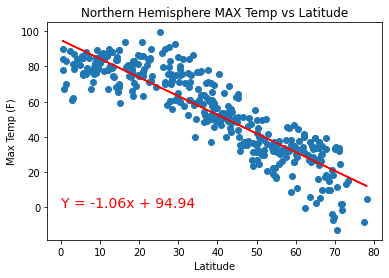

In [17]:
x_values = nhemi_df["Lat"]
y_values = nhemi_df["Max Temp"]
x_loc = 0
y_loc = 0
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere MAX Temp vs Latitude")
plt.savefig(f"../Images/N Hemisphere Temp vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4117391160533076


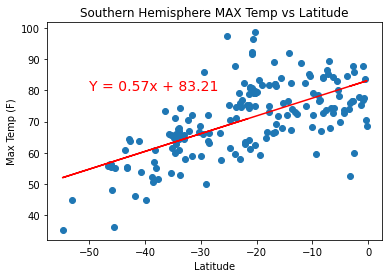

In [18]:
x_values = shemi_df["Lat"]
y_values = shemi_df["Max Temp"]
x_loc = -50
y_loc = 80
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere MAX Temp vs Latitude")
plt.savefig(f"../Images/S Hemi Max Temperature vs Latitude")
plt.show()

In [ ]:
#Analyze
#It appears the closer you are to the equator (lat = 0) the higher the max temps are for each city. This would make
#sense given cities near the equator are historically more temperate.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05303855247029505


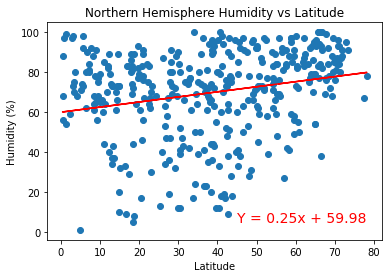

In [19]:
x_values = nhemi_df["Lat"]
y_values = nhemi_df["Humidity"]
x_loc = 45
y_loc = 5
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.savefig(f"../Images/N Hemi Humidity vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05079127876159568


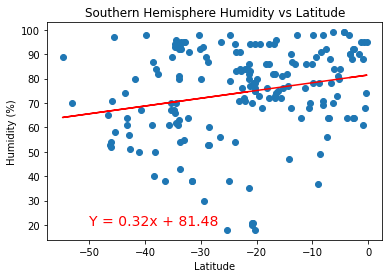

In [20]:
x_values = shemi_df["Lat"]
y_values = shemi_df["Humidity"]
x_loc = -50
y_loc = 20
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.savefig(f"../Images/S Hemi Humidity vs Latitude")
plt.show()

In [ ]:
#Analyze
#The Humidity across the cities as they get closer to the equator do not appear to correlate. The most frequent humidity
#percentages appear to be between the 60-90 percent range.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.026131052980483255


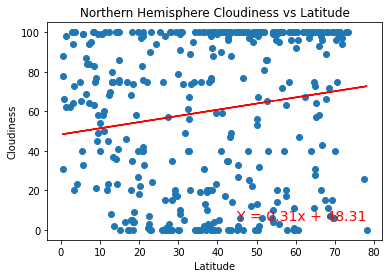

In [21]:
x_values = nhemi_df["Lat"]
y_values = nhemi_df["Cloudiness"]
x_loc = 45
y_loc = 5
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.savefig(f"../Images/N Hemi Cloudiness vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03457531005146581


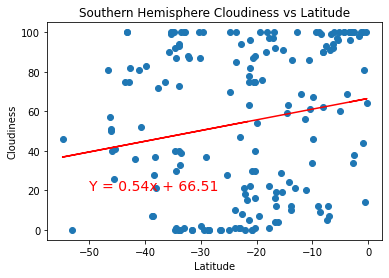

In [22]:
x_values = shemi_df["Lat"]
y_values = shemi_df["Cloudiness"]
x_loc = -50
y_loc = 20
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.savefig(f"../Images/S Hemi Cloudiness vs Latitude")
plt.show()

In [ ]:
#Analyze
#Similar to the humidity levels, there does not appear to be a strong correlation between the cloudiness levels and the
#proximity to the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00862682458205466


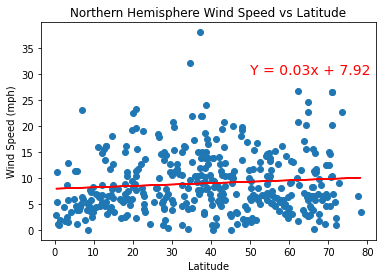

In [23]:
x_values = nhemi_df["Lat"]
y_values = nhemi_df["Wind Speed"]
x_loc = 50
y_loc = 30
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.savefig(f"../Images/N Hemi Wind Speed vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0720294239783785


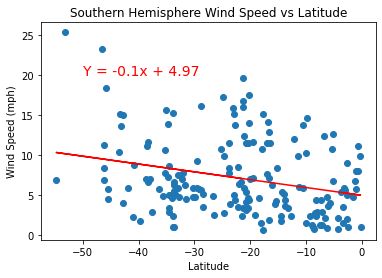

In [24]:
x_values = shemi_df["Lat"]
y_values = shemi_df["Wind Speed"]
x_loc = -50
y_loc = 20
linregression(x_values,y_values, x_loc, y_loc)
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.savefig(f"../Images/S Hemi Cloudiness vs Latitude")
plt.show()

In [ ]:
#Analyze
#For both the Northern and Southern hemispheres, there also does not appear to be a strong correlation with the proximity to
#the equator. However, it appears there are slightly lower speeds the closer the city is to the equator.